In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
train_path="/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train";
test_path="/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test";
val_path="/kaggle/input/chest-xray-pneumonia/chest_xray/val";
import tensorflow as tf

(1, 880, 1240, 3)


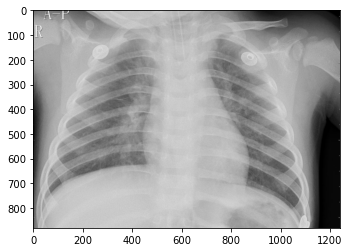

In [24]:
import matplotlib.pyplot as plt
import PIL
a=tf.keras.preprocessing.image.load_img('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person373_virus_756.jpeg')
plt.imshow(a)
b=tf.keras.preprocessing.image.img_to_array(a)
import numpy as np
c=np.expand_dims(b,axis=0).shape
print(c)

In [53]:
model=tf.keras.models.Sequential();
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(64,64,3),activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid))

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

In [71]:
training_set=train_datagen.flow_from_directory(train_path,target_size=(64,64),batch_size=32,class_mode='binary')
test_set=test_datagen.flow_from_directory(test_path,target_size=(64,64),batch_size=32,class_mode='binary')
val_set=test_datagen.flow_from_directory(val_path,target_size=(64,64),batch_size=16,class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [29]:
model.fit_generator(training_set,steps_per_epoch=5216/32,epochs=25,validation_data=val_set,validation_steps=16/8)

Epoch 1/25
163/163 [==============================] - 70s 429ms/step - loss: 0.3564 - accuracy: 0.8395 - val_loss: 0.4389 - val_accuracy: 0.7500
Epoch 2/25
163/163 [==============================] - 70s 431ms/step - loss: 0.2220 - accuracy: 0.9055 - val_loss: 0.3453 - val_accuracy: 0.8125
Epoch 3/25
163/163 [==============================] - 70s 431ms/step - loss: 0.2150 - accuracy: 0.9132 - val_loss: 0.4650 - val_accuracy: 0.7500
Epoch 4/25
163/163 [==============================] - 70s 431ms/step - loss: 0.1975 - accuracy: 0.9178 - val_loss: 0.3889 - val_accuracy: 0.6875
Epoch 5/25
163/163 [==============================] - 71s 433ms/step - loss: 0.1880 - accuracy: 0.9266 - val_loss: 0.1999 - val_accuracy: 0.9375
Epoch 6/25
163/163 [==============================] - 71s 433ms/step - loss: 0.1833 - accuracy: 0.9264 - val_loss: 0.2578 - val_accuracy: 1.0000
Epoch 7/25
163/163 [==============================] - 72s 441ms/step - loss: 0.1660 - accuracy: 0.9319 - val_loss: 0.3732 - val_ac

In [30]:
model.evaluate(test_set)

20/20 [==============================] - 6s 297ms/step - loss: 0.2772 - accuracy: 0.9087


[0.2771821916103363, 0.9086538553237915]

In [32]:
model.save('model-1.h5')

In [33]:
model.save_weights('weights-1.h5')

In [45]:
model.get_weights()

[array([[[[ 9.55500007e-02,  1.39084131e-01,  1.97802074e-02,
           -6.26305044e-02, -8.14135373e-02,  1.71313122e-01,
           -6.74807802e-02, -1.32047627e-02,  5.77464923e-02,
            9.50929150e-02, -1.87304839e-01,  8.81778300e-02,
           -8.00378695e-02,  7.75741935e-02, -5.93953244e-02,
            8.25464129e-02,  1.84518620e-01,  2.08393201e-01,
            7.66255107e-05, -5.45982309e-02,  1.10751027e-02,
           -1.76841363e-01,  1.85697436e-01,  8.34997743e-02,
           -8.32090154e-02, -2.30678916e-03,  4.70821559e-02,
            1.16868282e-03, -3.09766568e-02, -4.97906655e-02,
            5.76102920e-02,  1.11893542e-01],
          [ 1.12196818e-01, -6.45959154e-02,  3.32560278e-02,
           -5.68663329e-02,  1.37484998e-01,  5.26777431e-02,
            1.00573368e-01, -9.25721675e-02,  7.20946044e-02,
            9.30169746e-02, -1.20913416e-01, -6.35320246e-02,
           -8.44411030e-02, -8.12650770e-02,  1.52143970e-01,
            9.68260467e-

In [46]:
model2=tf.keras.models.Sequential();
model2.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(64,64,3),activation=tf.nn.relu))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(rate=0.15))
model2.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model2.add(tf.keras.layers.Dropout(rate=0.15))
model2.add(tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid))

In [47]:
model2.load_weights('weights-1.h5')

In [48]:
model2.get_weights()

[array([[[[ 9.55500007e-02,  1.39084131e-01,  1.97802074e-02,
           -6.26305044e-02, -8.14135373e-02,  1.71313122e-01,
           -6.74807802e-02, -1.32047627e-02,  5.77464923e-02,
            9.50929150e-02, -1.87304839e-01,  8.81778300e-02,
           -8.00378695e-02,  7.75741935e-02, -5.93953244e-02,
            8.25464129e-02,  1.84518620e-01,  2.08393201e-01,
            7.66255107e-05, -5.45982309e-02,  1.10751027e-02,
           -1.76841363e-01,  1.85697436e-01,  8.34997743e-02,
           -8.32090154e-02, -2.30678916e-03,  4.70821559e-02,
            1.16868282e-03, -3.09766568e-02, -4.97906655e-02,
            5.76102920e-02,  1.11893542e-01],
          [ 1.12196818e-01, -6.45959154e-02,  3.32560278e-02,
           -5.68663329e-02,  1.37484998e-01,  5.26777431e-02,
            1.00573368e-01, -9.25721675e-02,  7.20946044e-02,
            9.30169746e-02, -1.20913416e-01, -6.35320246e-02,
           -8.44411030e-02, -8.12650770e-02,  1.52143970e-01,
            9.68260467e-

In [49]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
model2.fit_generator(training_set,steps_per_epoch=5216/32,epochs=25,validation_data=val_set,validation_steps=16/8)

Epoch 1/25
163/163 [==============================] - 70s 430ms/step - loss: 0.1077 - accuracy: 0.9571 - val_loss: 0.1827 - val_accuracy: 0.9375
Epoch 2/25
163/163 [==============================] - 70s 432ms/step - loss: 0.1244 - accuracy: 0.9513 - val_loss: 0.2515 - val_accuracy: 0.8750
Epoch 3/25
163/163 [==============================] - 70s 431ms/step - loss: 0.1097 - accuracy: 0.9576 - val_loss: 0.2907 - val_accuracy: 0.6875
Epoch 4/25
163/163 [==============================] - 70s 432ms/step - loss: 0.1090 - accuracy: 0.9582 - val_loss: 0.3516 - val_accuracy: 0.7500
Epoch 5/25
163/163 [==============================] - 70s 432ms/step - loss: 0.1029 - accuracy: 0.9607 - val_loss: 0.8720 - val_accuracy: 0.6250
Epoch 6/25
163/163 [==============================] - 70s 432ms/step - loss: 0.1128 - accuracy: 0.9572 - val_loss: 0.4911 - val_accuracy: 0.7500
Epoch 7/25
163/163 [==============================] - 70s 429ms/step - loss: 0.1150 - accuracy: 0.9559 - val_loss: 0.3601 - val_ac

In [52]:
model2.evaluate(test_set)

20/20 [==============================] - 6s 305ms/step - loss: 0.3709 - accuracy: 0.9071


[0.3709149658679962, 0.9070512652397156]

In [54]:
model2.save('model-2.h5')
model2.save_weights('model-2.h5')

In [55]:
model2_json=model2.to_json()

In [56]:
model3=tf.keras.models.model_from_json(model2_json)

In [70]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6272)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [73]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model3.fit_generator(training_set,steps_per_epoch=5216/32,epochs=25,validation_data=val_set,validation_steps=16/16)

Epoch 1/25
163/163 [==============================] - 71s 433ms/step - loss: 0.3562 - accuracy: 0.8453 - val_loss: 0.3254 - val_accuracy: 0.8750
Epoch 2/25
163/163 [==============================] - 71s 433ms/step - loss: 0.2359 - accuracy: 0.9036 - val_loss: 0.2877 - val_accuracy: 0.8750
Epoch 3/25
163/163 [==============================] - 70s 432ms/step - loss: 0.2151 - accuracy: 0.9107 - val_loss: 0.3344 - val_accuracy: 0.8750
Epoch 4/25
163/163 [==============================] - 71s 434ms/step - loss: 0.1959 - accuracy: 0.9231 - val_loss: 0.3636 - val_accuracy: 0.8125
Epoch 5/25
163/163 [==============================] - 70s 430ms/step - loss: 0.1877 - accuracy: 0.9252 - val_loss: 0.5079 - val_accuracy: 0.6875
Epoch 6/25
163/163 [==============================] - 71s 435ms/step - loss: 0.1579 - accuracy: 0.9392 - val_loss: 0.2731 - val_accuracy: 0.9375
Epoch 7/25
163/163 [==============================] - 70s 430ms/step - loss: 0.1659 - accuracy: 0.9390 - val_loss: 0.3005 - val_ac

In [ ]:
model3.evaluate(test_set)